# Unsupervised Learning Project (07-31-19)

In [1]:
from scipy.stats import iqr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Machine Algo
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

## The importation of the data (https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/downloads/red-wine-quality-cortez-et-al-2009.zip/2)

In [2]:
wine = pd.read_csv('./DATA/winequality-red.csv')

## Remove the outliers on `free sulfur dioxide`, and `total sulfur dioxide`.

In [3]:
columns =["free sulfur dioxide", "total sulfur dioxide"]

def remove_outliers(data, x):
    Q75 = np.percentile(data[x], 75)  
    outliers = Q75 + 1.5 * iqr(data[x])
    data = data[data[x] <= outliers]
    return data

for col in columns:
    wine = remove_outliers(wine, col)

## Transform and scale the DataFrame

In [4]:
scaler = StandardScaler()
scaler.fit(wine)
X = scaler.transform(wine)

## Dislplay which cluster is the best for use via KMEANS

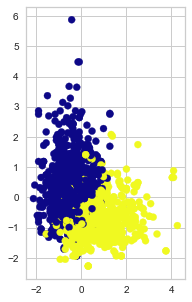

In [5]:
plt.figure(figsize=(20, 5))

kmeans = KMeans(n_clusters=2)
t = kmeans.fit_predict(X)
plt.subplot(1,6,2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='plasma')
plt.show()

## Display silhouette score for KMEANS

In [6]:
kmeans = KMeans(n_clusters=2).fit(X) 
wine['clusters'] = kmeans.labels_
KMEANS_SCORE = silhouette_score(X, kmeans.predict(X), metric='euclidean')
KMEANS_SCORE

0.2066637018547136

## Display silhouette score for DBSCAN

In [7]:
dbscan = DBSCAN(eps=0.4).fit(X)
wine['DBSCAN'] = dbscan.labels_
DBSCAN_SCORE = silhouette_score(X, wine['DBSCAN'], metric='euclidean')
DBSCAN_SCORE

-0.08037721227381409